In [8]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
def confidence_interval(data, confidence=0.95):
    n = len(data)
    m, se = np.mean(data), st.sem(data)
    h = se * st.t.ppf((1 + confidence) / 2., n-1)
    return m, h

# def CI_median(data):
#     data.sort()
#     n = len(data)
#     idx1 = int(np.round((n/2)-(1.96*np.sqrt(n)/2)))
#     idx2 = int(np.round(1+(n/2)+(1.96*np.sqrt(n)/2)))
#     lower = data[idx1]
#     upper = data[idx2]
#     return lower, upper

In [10]:
lag = 512

base = pd.read_pickle('./pkl_datasets/mamiraua_dataset_ACF_' + str(lag) + '.gzip')
cotas = pd.read_csv('./boundary_files/Cotas_HxC_bins_' + str(int(lag)) + '.csv')
noise = pd.read_csv('./coloredNoises/coloredNoises_' + str(int(lag)) + '.csv')

## Information Theory Quantifier Signatures

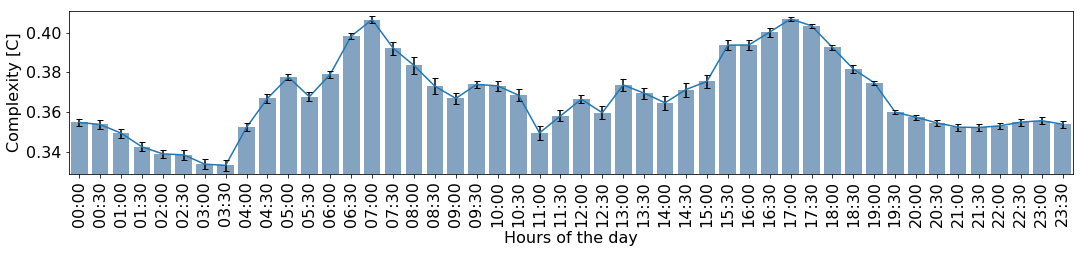

In [13]:
time = np.unique(base['time'])

C_mu = np.empty((0))
C_CI = np.empty((0))

t = np.empty(0)
for j in time:
        t = np.append(t,str(j[0:2] + ':' + j[2:4]))

        C = base.loc[base['time'] == j]['C']
        C_mu = np.append(C_mu,np.mean(C))
        C_CI = np.append(C_CI,confidence_interval(C)[1])        

plt.figure(figsize=(18,3))
plt.rc('font', size=16)
plt.rc('axes', titlesize=16)
plt.plot(C_mu)
plt.bar(np.arange(len(C_mu)), C_mu, width=0.8, yerr=C_CI, capsize=3, tick_label = t, color=(0.2, 0.4, 0.6, 0.6))
plt.xlim([-0.5, 47.5])
plt.ylim([np.min(C_mu)-np.max(C_CI),np.max(C_mu)+np.max(C_CI)])
plt.xlabel('Hours of the day')
plt.ylabel('Complexity [C]')
plt.xticks(rotation=90)
plt.rc('font', size=16)
plt.rc('axes', titlesize=16)
plt.savefig('./figures/Fig5.eps', format="eps", bbox_inches='tight')

plt.show()